In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report

In [70]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [71]:
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

In [ ]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[28, 28, 1]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))

cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model = cnn.fit(x_train,y_train, batch_size=32, epochs=25)

In [79]:
y_pred = cnn.predict(x_test)

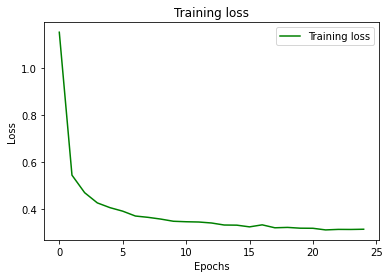

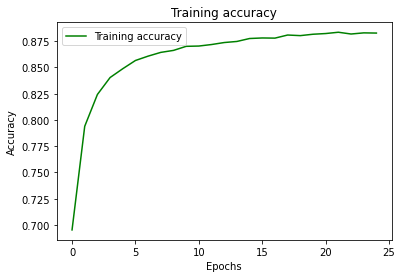

In [81]:
plt.plot(model.epoch, model.history["loss"], 'g', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(model.epoch, model.history["accuracy"], 'g', label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [84]:
counter = 0
correct = 0
for i in range(len(y_pred)):
  if (np.argmax(y_pred[i]) == np.argmax(y_test[i])):
    correct += 1
  counter += 1
print(correct/counter)

0.8989


In [94]:
confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

array([[859,   0,  18,  11,   1,   1, 105,   0,   5,   0],
       [  0, 974,   0,  17,   4,   0,   2,   0,   3,   0],
       [ 17,   0, 876,   9,  51,   0,  47,   0,   0,   0],
       [ 17,   2,   8, 924,  23,   0,  25,   0,   1,   0],
       [  2,   0, 101,  34, 801,   0,  61,   0,   1,   0],
       [  0,   0,   0,   0,   0, 978,   0,  14,   0,   8],
       [122,   1,  99,  21,  86,   0, 667,   0,   4,   0],
       [  0,   0,   0,   0,   0,  10,   0, 974,   0,  16],
       [  1,   0,   4,   5,   4,   2,   2,   0, 981,   1],
       [  1,   0,   0,   1,   0,   4,   0,  39,   0, 955]])

In [101]:
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9']
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1), target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.84      0.86      0.85      1000
     class 1       1.00      0.97      0.99      1000
     class 2       0.79      0.88      0.83      1000
     class 3       0.90      0.92      0.91      1000
     class 4       0.83      0.80      0.81      1000
     class 5       0.98      0.98      0.98      1000
     class 6       0.73      0.67      0.70      1000
     class 7       0.95      0.97      0.96      1000
     class 8       0.99      0.98      0.98      1000
     class 9       0.97      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

